# Collaborative Filtering of Consumer Review of Amazon Product

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from fuzzywuzzy import fuzz
import matplotlib.pyplot as plt

d:\dev\project\UmkmartRecsys\umkmart-recsys\venv\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## 1. Load The Dataset

In [3]:
dfReview = pd.read_csv("../data/Amazon/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")

In [4]:
dfReview.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


In [5]:
dfReview.describe()

,reviews.id,reviews.numHelpful,reviews.rating
count,2.900000e+01,5000.000000,5000.000000
mean,1.858740e+08,0.312400,4.596800
std,2.084040e+07,3.111582,0.731804
min,1.082112e+08,0.000000,1.000000
25%,1.851185e+08,0.000000,4.000000
50%,1.880757e+08,0.000000,5.000000
75%,1.981949e+08,0.000000,5.000000
max,2.027812e+08,105.000000,5.000000


In [6]:
dfReview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5000 non-null   object 
 1   dateAdded            5000 non-null   object 
 2   dateUpdated          5000 non-null   object 
 3   name                 5000 non-null   object 
 4   asins                5000 non-null   object 
 5   brand                5000 non-null   object 
 6   categories           5000 non-null   object 
 7   primaryCategories    5000 non-null   object 
 8   imageURLs            5000 non-null   object 
 9   keys                 5000 non-null   object 
 10  manufacturer         5000 non-null   object 
 11  manufacturerNumber   5000 non-null   object 
 12  reviews.date         5000 non-null   object 
 13  reviews.dateAdded    1052 non-null   object 
 14  reviews.dateSeen     5000 non-null   object 
 15  reviews.doRecommend  5000 non-null   b

## 2. Exploratory Data Analysis

#### 2.1. Plot the Counts of Each Rating

In [7]:
import random
import string

items_df = dfReview[["id", "name"]]
items_df.rename(columns={
    "id": "product_id",
}, inplace=True)
items_df.drop_duplicates(subset="product_id", inplace=True)
items_df.reset_index(drop=True, inplace=True)

items_df['name'] = items_df['name'].str.replace('[,"()]', '', regex=True)
random.seed(42)  # Seed agar nilai acak konsisten setiap kali dijalankan
items_df['merchant_id'] = ["637fc2d5-e57c-39c3-b9cf-073a468c75fa" for _ in range(24)]
items_df['product_category_id'] = [random.randint(6, 10) for _ in range(24)]
items_df['minimal_order'] = [random.randint(1, 5) for _ in range(24)]
items_df['short_desc'] = [f'Description {i}' for i in range(1, 25)]
items_df['price_value'] = [round(random.randint(10000, 500000), 2) for _ in range(24)]
items_df['stock_value'] = [random.randint(1, 20) for _ in range(24)]

items_df

C:\Users\anfahrul\AppData\Local\Temp\ipykernel_24828\462678176.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items_df.rename(columns={
C:\Users\anfahrul\AppData\Local\Temp\ipykernel_24828\462678176.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items_df.drop_duplicates(subset="product_id", inplace=True)
C:\Users\anfahrul\AppData\Local\Temp\ipykernel_24828\462678176.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

,product_id,name,merchant_id,product_category_id,minimal_order,short_desc,price_value,stock_value
0,AVqVGZNvQMlgsOJE6eUY,Amazon Kindle E-Reader 6 Wifi 8th Generation 2016,637fc2d5-e57c-39c3-b9cf-073a468c75fa,6,4,Description 1,51313,9
1,AWFUWc8THh53nbDRF6YO,Amazon Echo Show Alexa-enabled Bluetooth Speak...,637fc2d5-e57c-39c3-b9cf-073a468c75fa,6,5,Description 2,299428,15
2,AWK8z0pOIwln0LfXlSxH,Amazon Echo Show Alexa-enabled Bluetooth Speak...,637fc2d5-e57c-39c3-b9cf-073a468c75fa,8,3,Description 3,163709,12
3,AV-XeQLWuC1rwyj_gbP5,Amazon Fire TV with 4K Ultra HD and Alexa Voic...,637fc2d5-e57c-39c3-b9cf-073a468c75fa,7,1,Description 4,444846,6
4,AWMjT0WguC1rwyj_rFh3,Amazon - Echo Plus w/ Built-In Hub - Silver,637fc2d5-e57c-39c3-b9cf-073a468c75fa,7,2,Description 5,339588,12
5,AVpfIfGA1cnluZ0-emyp,Amazon 9W PowerFast Official OEM USB Charger a...,637fc2d5-e57c-39c3-b9cf-073a468c75fa,7,4,Description 6,334282,12
6,AVph0EeEilAPnD_x9myq,Fire Kids Edition Tablet 7 Display Wi-Fi 16 GB...,637fc2d5-e57c-39c3-b9cf-073a468c75fa,6,3,Description 7,474231,7
7,AVqVGZSEQMlgsOJE6eUc,Kindle E-reader - White 6 Glare-Free Touchscre...,637fc2d5-e57c-39c3-b9cf-073a468c75fa,10,3,Description 8,461782,9
8,AVpgdkC8ilAPnD_xsvyi,Fire Tablet 7 Display Wi-Fi 16 GB - Includes S...,637fc2d5-e57c-39c3-b9cf-073a468c75fa,6,2,Description 9,199600,3
9,AVqVGWLKnnc1JgDc3jF1,Fire Kids Edition Tablet 7 Display Wi-Fi 16 GB...,637fc2d5-e57c-39c3-b9cf-073a468c75fa,10,2,Description 10,312698,20


In [8]:
import os
import pandas as pd

items_data_path: str = os.path.join('../artifacts/csv-for-import', 'items.csv')
os.makedirs(os.path.dirname(items_data_path), exist_ok=True)
items_df.to_csv(items_data_path, index=False, header=True)

In [9]:
users_df = dfReview[["reviews.username"]]
users_df.rename(columns={
    "reviews.username": "username",
}, inplace=True)
users_df.drop_duplicates(subset="username", inplace=True)
users_df.reset_index(drop=True, inplace=True)

random.seed(42)
users_df.insert(0, 'id', [''.join(random.choices(string.ascii_letters + string.digits, k=36)) for _ in range(3815)])
users_df['email'] = ["{}-{}@example.com".format(users_df.iloc[i]['username'], i) for i in range(0, 3815)]
users_df['password'] = ["$2y$10$92IXUNpkjO0rOQ5byMi.Ye4oKoEa3Ro9llC/.og/at2.uheWG/igi" for _ in range(3815)]
users_df['role'] = ["user" for _ in range(3815)]
users_df['registration_at'] = ["708507009" for _ in range(3815)]

users_df

C:\Users\anfahrul\AppData\Local\Temp\ipykernel_24828\1886557039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_df.rename(columns={
C:\Users\anfahrul\AppData\Local\Temp\ipykernel_24828\1886557039.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_df.drop_duplicates(subset="username", inplace=True)
C:\Users\anfahrul\AppData\Local\Temp\ipykernel_24828\1886557039.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

,id,username,email,password,role,registration_at
0,NbrnTP3fAbnFbmOHnKYaXRvj7uff0LYTH8xI,llyyue,llyyue-0@example.com,$2y$10$92IXUNpkjO0rOQ5byMi.Ye4oKoEa3Ro9llC/.og...,user,708507009
1,ZM1JRcoreogrNwwmq6OLkTkx9NIQ0Wobtqn6,Charmi,Charmi-1@example.com,$2y$10$92IXUNpkjO0rOQ5byMi.Ye4oKoEa3Ro9llC/.og...,user,708507009
2,2tOy4CqpIqK3yn9FfcgMXAdx9G81aSQHqNgA,johnnyjojojo,johnnyjojojo-2@example.com,$2y$10$92IXUNpkjO0rOQ5byMi.Ye4oKoEa3Ro9llC/.og...,user,708507009
3,C72qFl41sNLjVHWGaub52Ztd26fEeVVhDIq2,Kdperry,Kdperry-3@example.com,$2y$10$92IXUNpkjO0rOQ5byMi.Ye4oKoEa3Ro9llC/.og...,user,708507009
4,AnHTmt9OBGhnuKoneNo41eoPni6JDWYlgAAC,Johnnyblack,Johnnyblack-4@example.com,$2y$10$92IXUNpkjO0rOQ5byMi.Ye4oKoEa3Ro9llC/.og...,user,708507009
...,...,...,...,...,...,...
3810,TmfMjqYk5kq5LC5tIqXwQa4El5YD2N2UXNzP,QueenT,QueenT-3810@example.com,$2y$10$92IXUNpkjO0rOQ5byMi.Ye4oKoEa3Ro9llC/.og...,user,708507009
3811,iRlSOsZj12eCVg3kpS59WDav8ATxB4yLPiba,Toddler,Toddler-3811@example.com,$2y$10$92IXUNpkjO0rOQ5byMi.Ye4oKoEa3Ro9llC/.og...,user,708507009
3812,6SLjA7m5sqOBo8e1zh10bhHTcvcNbz3kBVEx,litle,litle-3812@example.com,$2y$10$92IXUNpkjO0rOQ5byMi.Ye4oKoEa3Ro9llC/.og...,user,708507009
3813,UUYeKrG1TYsjVjif7JPs0wb7OVrlIgect5Wl,gracie,gracie-3813@example.com,$2y$10$92IXUNpkjO0rOQ5byMi.Ye4oKoEa3Ro9llC/.og...,user,708507009


In [10]:
users_data_path: str = os.path.join('../artifacts/csv-for-import', 'users.csv')
os.makedirs(os.path.dirname(users_data_path), exist_ok=True)
users_df.to_csv(users_data_path, index=False, header=True)

In [11]:
ratings_df = dfReview[["reviews.username", "id", "reviews.rating"]]
ratings_df.rename(columns={
    "reviews.username": "username",
    "id": "product_id",
    "reviews.rating": "rating"
}, inplace=True)
ratings_df.reset_index(drop=True, inplace=True)

username_to_id_mapping = users_df.set_index('username')['id'].to_dict()
ratings_df['username'] = ratings_df['username'].map(username_to_id_mapping)
ratings_df.rename(columns={"username": "user_id",}, inplace=True)
ratings_df.head()

C:\Users\anfahrul\AppData\Local\Temp\ipykernel_24828\2778557513.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_df.rename(columns={
C:\Users\anfahrul\AppData\Local\Temp\ipykernel_24828\2778557513.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_df['username'] = ratings_df['username'].map(username_to_id_mapping)
C:\Users\anfahrul\AppData\Local\Temp\ipykernel_24828\2778557513.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/panda

,user_id,product_id,rating
0,NbrnTP3fAbnFbmOHnKYaXRvj7uff0LYTH8xI,AVqVGZNvQMlgsOJE6eUY,3
1,ZM1JRcoreogrNwwmq6OLkTkx9NIQ0Wobtqn6,AVqVGZNvQMlgsOJE6eUY,5
2,2tOy4CqpIqK3yn9FfcgMXAdx9G81aSQHqNgA,AVqVGZNvQMlgsOJE6eUY,4
3,C72qFl41sNLjVHWGaub52Ztd26fEeVVhDIq2,AVqVGZNvQMlgsOJE6eUY,5
4,AnHTmt9OBGhnuKoneNo41eoPni6JDWYlgAAC,AVqVGZNvQMlgsOJE6eUY,5


In [12]:
ratings_data_path: str = os.path.join('../artifacts/csv-for-import', 'ratings.csv')
os.makedirs(os.path.dirname(ratings_data_path), exist_ok=True)
ratings_df.to_csv(ratings_data_path, index=False, header=True)

In [13]:
numUsers = len(users_df)
numItems = len(items_df)
numRatings = len(ratings_df)

print('Num users:', numUsers)
print('Num items:', numItems)
print('Num ratings:', numRatings)

Num users: 3815
Num items: 24
Num ratings: 5000


In [14]:
each_rating_count = pd.DataFrame(ratings_df.groupby('rating').size(), columns=['count'])
each_rating_count

,count
rating,
1,63
2,54
3,197
4,1208
5,3478


In [15]:
totalCount = numUsers * numItems
ratingZeroCount = totalCount - ratings_df.shape[0]
dfRatingZeroCount = pd.DataFrame({'rating': [0], 'count': [ratingZeroCount]})

dfRatingCount = pd.concat([each_rating_count.reset_index(), dfRatingZeroCount], ignore_index=True)
dfRatingCount

,rating,count
0,1,63
1,2,54
2,3,197
3,4,1208
4,5,3478
5,0,86560


In [16]:
dfRatingCount['log_count'] = np.log(dfRatingCount['count'])
dfRatingCount

,rating,count,log_count
0,1,63,4.143135
1,2,54,3.988984
2,3,197,5.283204
3,4,1208,7.096721
4,5,3478,8.154213
5,0,86560,11.368593


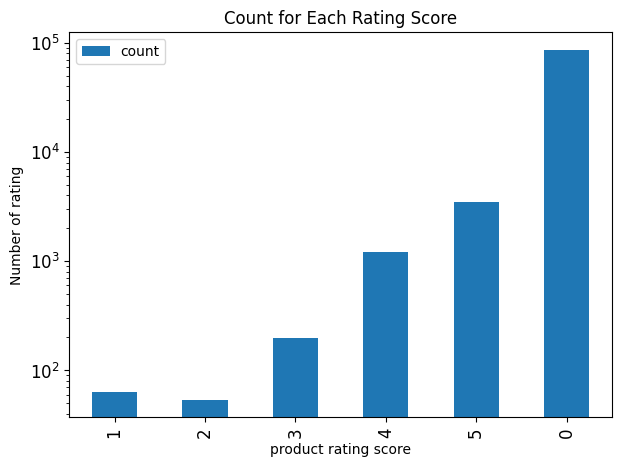

In [17]:
ax = dfRatingCount.reset_index().plot(
    x='rating',
    y='count',
    kind='bar',
    figsize=(7, 5),
    title='Count for Each Rating Score',
    logy=True,
    fontsize=12,
)

plt.xlabel('product rating score')
plt.ylabel('Number of rating')
plt.show()

#### 2.3. Plot Rating Frequency of All Products

In [18]:
items_df_count = pd.DataFrame(ratings_df.groupby('product_id').size(), columns=['count'])
items_df_count.head()

,count
product_id,
AV-XeQLWuC1rwyj_gbP5,4
AVpfIfGA1cnluZ0-emyp,22
AVpfpK8KLJeJML43BCuD,225
AVpftoij1cnluZ0-p5n2,22
AVpgdkC8ilAPnD_xsvyi,371


In [19]:
items_df_count['count'].quantile(np.arange(1, 0.5, -0.05))

1.00    797.00
0.95    641.00
0.90    581.30
0.85    518.70
0.80    409.40
0.75    261.50
0.70    217.80
0.65    193.20
0.60    148.40
0.55    104.25
Name: count, dtype: float64

In [20]:
# filter data
popularityThres = 50
popularProduct = list(set(items_df_count.query('count >= @popularityThres').index))
dfRatingDropProduct = ratings_df[ratings_df.product_id.isin(popularProduct)]
print('Shape of original rating data: ', ratings_df.shape)
print('Shape of rating data after dropping unpopular product: ', dfRatingDropProduct.shape)

Shape of original rating data:  (5000, 3)
Shape of rating data after dropping unpopular product:  (4849, 3)


In [21]:
dfUserCount = pd.DataFrame(dfRatingDropProduct.groupby('user_id').size(), columns=['count'])
dfUserCount.head()

,count
user_id,
001UESIph4nzh6SMBoF6fh6o9IlBD9XBoyTy,1
004CU3xR5fFywsrVpOBA8QLlnzaOxCiki2hs,1
00TMiTKe20O3Dt2CD1kiz366g9gIl9ZvgEfW,1
02blZZpC4RqZFNhbxKl1Kvk3UQrxkJ71OQqz,1
04rytiBbw9ZGu0XJWnCIdoCr4I8ct15pcU37,2


Text(0, 0.5, 'Number of Rating')

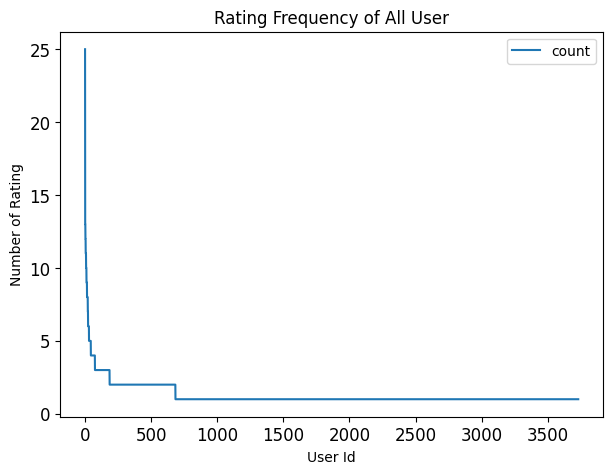

In [22]:
ax = dfUserCount \
    .sort_values('count', ascending=False) \
    .reset_index(drop=True) \
    .plot(
        figsize=(7,5),
        title='Rating Frequency of All User',
        fontsize=12
    )
ax.set_xlabel("User Id")
ax.set_ylabel("Number of Rating")

In [23]:
dfUserCount['count'].quantile(np.arange(1, 0.5, -0.05))

1.00    25.0
0.95     2.0
0.90     2.0
0.85     2.0
0.80     1.0
0.75     1.0
0.70     1.0
0.65     1.0
0.60     1.0
0.55     1.0
Name: count, dtype: float64

In [32]:
# dfUserCount

In [33]:
# filter data
popularityThres = 3
popularUser = list(set(dfUserCount.query('count >= @popularityThres').index))
dfRatingDropUser = dfRatingDropProduct[dfRatingDropProduct.user_id.isin(popularUser)]
print('Shape of original rating data: ', ratings_df.shape)
print('Shape of rating data after dropping unpopular user: ', dfRatingDropUser.shape)

Shape of original rating data:  (5000, 3)
Shape of rating data after dropping unpopular user:  (805, 3)


In [25]:
ratings_df_fix = dfRatingDropUser.reset_index(drop=True)
ratings_df_fix

,user_id,product_id,rating
0,TP9gyv1plBArp5B1Id9Z850kEnydx9qWCA79,AVqVGZNvQMlgsOJE6eUY,5
1,k7Gdp0CXP9K63LSFZH3UDqpNVGMrerqtHioR,AVqVGZNvQMlgsOJE6eUY,5
2,RdzHzmA4KR1VxavU07zUHLnnBbuQzkChMbyI,AVqVGZNvQMlgsOJE6eUY,5
3,HDBTq0Zf2pCLxb0lnXv2Rra6fSEVQOEXfnQs,AVqVGZNvQMlgsOJE6eUY,5
4,KDGAUuRqphlhHVlnES8GrgmolaHr8IRh1E2J,AVqVGZNvQMlgsOJE6eUY,4
...,...,...,...
822,kkuWspLoN9BHZCaNOH1xhTLiBgIu62j1dvOW,AVqkIdZiv8e3D1O-leaJ,4
823,ciJER1foccjDUaPKxN8GqiofIPRjAlNK2Rsy,AVqkIdZiv8e3D1O-leaJ,4
824,51fE04UGRHN4E9EJd86l0WP3J8QSYpZhYOVc,AVqkIdZiv8e3D1O-leaJ,4
825,f2ZWnYQt63qMmn4x9yyOb39NEKtMH7gmb97B,AVqkIdZiv8e3D1O-leaJ,5


## 3. Prepare the Data

In [26]:
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split

In [27]:
dfProductFiltered = dfRatingFix[['productId']].drop_duplicates()
dfProductFiltered.reset_index(drop=True, inplace=True)

mergedDfProduct = pd.merge(dfProductFiltered, dfReview, on='productId', how='left')
dfProduct = mergedDfProduct[['productId', 'name', 'brand', 'primaryCategories', 'categories', 'imageURLs']].drop_duplicates()
dfProduct.reset_index(drop=True, inplace=True)

dfProduct

NameError: name 'dfRatingFix' is not defined

In [ ]:
dfUser = dfRatingFix[['username']].drop_duplicates()
dfUser.reset_index(drop=True, inplace=True)
dfUser

In [ ]:
# pivot and create product-user matrix
productUserMatrix = dfRatingFix.pivot_table(index='productId', columns='username', values='rating', fill_value=0)
# productUserMatrix

In [ ]:
#create mapper from product name to index
productToIndex = {
    product: i for i, product in
    enumerate(list(dfProduct.set_index('productId').loc[productUserMatrix.index].name))
}

# transform matrix to scipy sparse matrix
productUserMatrixSparse = csr_matrix(productUserMatrix.values)

In [ ]:
productUserMatrixSparse

## [Reference 1]

## 4. Train KNN Model

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
#define model
knnModel = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10, n_jobs=-1)

#fit
knnModel.fit(productUserMatrixSparse)

## 5. Create Recommendation

In [ ]:
def fuzzyMatching(mapper, favProduct, verbose=True):
    matchTuple = []

    #get match
    for name, idx in mapper.items():
        ratio = fuzz.ratio(name.lower(), favProduct.lower())
        if ratio >= 60:
            matchTuple.append((name, idx, ratio))
    
    # sort
    matchTuple = sorted(matchTuple, key=lambda x: x[2])[::-1]
    if not matchTuple:
        print('Oops! No match is found')
        return
    if verbose:
        print('Found possible matches in our database: {0}\n'.format([x[0] for x in matchTuple]))
    
    return matchTuple[0][1]


def makeRecommendation(modelKnn, data, mapper, favProduct, nRecommendation):
    # fit
    modelKnn.fit(data)
    # get input movie index
    print('You have input product: ', favProduct)
    idx = fuzzyMatching(mapper, favProduct, verbose=True)
    #inference
    print('Recommendation system start to make inference')
    print('........\n')
    distances, indices = modelKnn.kneighbors(data[idx], n_neighbors=nRecommendation+1)
    # get list of raw idx of recommendations
    print("idx", idx)
    print("indices", indices)
    rawRecommends = \
        sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x:x[1])[:0:-1]
    # get reverse mapper
    reverseMapper = {v: k for k, v in mapper.items()}
    # print recommendation
    print('Recommendation for {}:'.format(favProduct))
    for i, (idx, dist) in enumerate(rawRecommends):
        print('{0}: {1}, with distance of {2}'.format(i+1, reverseMapper[idx], dist))




In [ ]:
myFavorite = 'All-New Fire HD 8 Tablet, 8 HD Display'

# fuzzyMatching(productToIndex, myFavorite)

makeRecommendation(
    modelKnn=knnModel,
    data=productUserMatrixSparse,
    favProduct=myFavorite,
    mapper=productToIndex,
    nRecommendation=5
)


## [Reference 2]
## 4. Train KNN Model

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split

In [ ]:
# knn2 = NearestNeighbors(metric='cosine', algorithm='brute')
# knn2.fit(productUserMatrixSparse)
# distance, indices = knn2.kneighbors(productUserMatrix.values, n_neighbors=10)

train_data, test_data = train_test_split(productUserMatrix, test_size=0.2, random_state=42)

def train_model(data_train, num_neighbors):
    model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=num_neighbors, n_jobs=-1)
    model.fit(data_train.values)

    return model

knnTest = train_model(train_data, 5)
distance, indices = knnTest.kneighbors(test_data, n_neighbors=5)

In [ ]:
indices

In [ ]:
distance

In [ ]:
for product in productUserMatrix.index:
    indexUserLikes = productUserMatrix.index.tolist().index(product)
    simProduct = indices[indexUserLikes].tolist()
    productDistance = distance[indexUserLikes].tolist()
    idProduct = simProduct.index(indexUserLikes)

    print('Similar movie to ' + str(productUserMatrix.index[indexUserLikes]) + ':\n')

    simProduct.remove(indexUserLikes)
    productDistance.pop(idProduct)

    j = 1
    for i in simProduct:
        print(str(j) + ': ' + str(productUserMatrix.index[i]) + ', the distance with product liked is ' + str(productDistance[j-1]))
        j += 1
    
    print('\n')


## 5. Create Recommendation

#### 4.1. Recommend Similar product to a selected Product

In [ ]:
def recommendProduct(product):
    indexUserLikes = productUserMatrix.index.tolist().index(product)
    simProduct = indices[indexUserLikes].tolist()
    productDistance = distance[indexUserLikes].tolist()
    idProduct = simProduct.index(indexUserLikes)

    print('Similar movie to ' + str(productUserMatrix.index[indexUserLikes]) + ':\n')

    simProduct.remove(indexUserLikes)
    productDistance.pop(idProduct)

    j = 1
    for i in simProduct:
        print(str(j) + ': ' + str(productUserMatrix.index[i]) + ', the distance with product liked is ' + str(productDistance[j-1]))
        j += 1
    
    print('\n')


In [ ]:
recommendProduct('AVpftoij1cnluZ0-p5n2')

#### 4.2. Recommend Product for a Selected User

In [ ]:
def recommend_products_by_rank(user, num_recommended_product):

  print('The list of the Product {} Has Rated \n'.format(user))

  for p in productUserMatrix[productUserMatrix[user] > 0][user].index.tolist():
    print(p)
  
  print('\n')

  recommended_products = []

  for p in productUserMatrix[productUserMatrix[user] == 0].index.tolist():

    index_df = productUserMatrix.index.tolist().index(p)
    predicted_rating = productUserMatrixCopied.iloc[index_df, productUserMatrixCopied.columns.tolist().index(user)]
    recommended_products.append((p, predicted_rating))

  sorted_rp = sorted(recommended_products, key=lambda x:x[1], reverse=True)
  
  print('The list of the Recommended Products \n')
  rank = 1
  for recommended_product in sorted_rp[:num_recommended_product]:
    
    print('{}: {} - predicted rating:{}'.format(rank, recommended_product[0], recommended_product[1]))
    rank = rank + 1

In [ ]:
# store the original dataset in 'df', and create the copy of df,
productUserMatrixCopied = productUserMatrix.copy()

def product_recommender(user, model, num_neighbors, num_recommendation):

  # number_neighbors = num_neighbors
  # knn = NearestNeighbors(metric='cosine', algorithm='brute')
  model.fit(productUserMatrix.values)
  distances, indices = model.kneighbors(productUserMatrix.values, n_neighbors=num_neighbors)

  user_index = productUserMatrix.columns.tolist().index(user)

  # name: product name, idx: the row number of product in df
  for idxProduct, name in list(enumerate(productUserMatrix.index)):
    
    # find movies without ratings by user
    if productUserMatrix.iloc[idxProduct, user_index] == 0:
      sim_products = indices[idxProduct].tolist()
      product_distances = distances[idxProduct].tolist()

      # Generally, this is the case: indices[3] = [3 6 7]. The movie itself is in the first place.
      # In this case, we take off 3 from the list. Then, indices[3] == [6 7] to have the nearest NEIGHBORS in the list. 
      if idxProduct in sim_products:
        id_product = sim_products.index(idxProduct)
        sim_products.remove(idxProduct)
        product_distances.pop(id_product) 

      # However, if the percentage of ratings in the dataset is very low, there are too many 0s in the dataset. 
      # Some movies have all 0 ratings and the movies with all 0s are considered the same movies by NearestNeighbors(). 
      # Then,even the movie itself cannot be included in the indices. 
      # For example, indices[3] = [2 4 7] is possible if movie_2, movie_3, movie_4, and movie_7 have all 0s for their ratings.
      # In that case, we take off the farthest movie in the list. Therefore, 7 is taken off from the list, then indices[3] == [2 4].
      else:
        sim_products = sim_products[:num_neighbors-1]
        product_distances = product_distances[:num_neighbors-1]

      # movie_similarty = 1 - movie_distance
      product_similarity = [1-x for x in product_distances]
      product_similarity_copy = product_similarity.copy()
      # Nominator adalah jumlah keseluruhan dari perkalian antara similarity dan rating tiap anggota neighbors; syarat rating anggota != 0
      nominator = 0

      # for each similar movie
      for IdxOfS in range(0, len(product_similarity)):
        
        # check if the rating of a similar movie is zero
        if productUserMatrix.iloc[sim_products[IdxOfS], user_index] == 0:
          
          # if the rating is zero, ignore the rating and the similarity in calculating the predicted rating
          if len(product_similarity_copy) == (num_neighbors - 1):
            product_similarity_copy.pop(IdxOfS)
          
          else:
            product_similarity_copy.pop(IdxOfS-(len(product_similarity)-len(product_similarity_copy)))
                
        # if the rating is not zero, use the rating and similarity in the calculation
        else:
          nominator += product_similarity[IdxOfS]*productUserMatrix.iloc[sim_products[IdxOfS],user_index]
      
      
      # check if the number of the ratings with non-zero is positive 
      if len(product_similarity_copy) > 0:

        # check if the sum of the ratings of the similar movies is positive.
        if sum(product_similarity_copy) > 0:
          # menghitung nilai prediksi rating dengan membagi total kontribusi dari produk tetangga (nilai nominator) dengan total similarity produk yang masih dalam pertimbangan (nilai penyebut).
          # Ini memberikan bobot rata-rata dari kontribusi produk tetangga dalam prediksi rating produk saat ini.
          predicted_r = nominator/sum(product_similarity_copy)
        
        # Even if there are some movies for which the ratings are positive, some movies have zero similarity even though they are selected as similar movies.
        # in this case, the predicted rating becomes zero as well  
        else:
          predicted_r = 0

      # if all the ratings of the similar movies are zero, then predicted rating should be zero
      else:
        predicted_r = 0
        
      productUserMatrixCopied.iloc[idxProduct,user_index] = round(predicted_r, 2)
  recommend_products_by_rank(user, num_recommendation)

In [ ]:
item_rated_count = (productUserMatrix != 0).sum(axis=0)
filteredUser = item_rated_count[item_rated_count >= 5]
# filteredUser

In [ ]:
product_recommender('1234', knnTest, 5, 10)

In [ ]:
# summ = 0
# for idx, user in dfUser.iterrows():
#     username = user['username']
#     product_recommender(username, knn2, 5, 10)
#     summ +=1

# summ

In [ ]:
productUserMatrixCopied

In [ ]:
# Sparsity check

# sebelum prediksi rating
non_zero_count_old = productUserMatrix.astype(bool).sum().sum()
total_possible_count_old = productUserMatrix.shape[0] * productUserMatrix.shape[1]
sparsity_old = 1 - (non_zero_count_old / total_possible_count_old)

# setelah prediksi rating
non_zero_count_new = productUserMatrixCopied.astype(bool).sum().sum()
total_possible_count_new = productUserMatrixCopied.shape[0] * productUserMatrixCopied.shape[1]
sparsity_new = 1 - (non_zero_count_new / total_possible_count_new)

persentase_penurunan = ((sparsity_old - sparsity_new) / sparsity_old) * 100
print(round(persentase_penurunan, 2), "%")

## 6. Evaluate the Model

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold
from math import sqrt
import math

Optimasi nilai K pada KNN

In [ ]:
k_values = [i for i in range (1,31)]
scores = []

#### Example Dataset

In [ ]:
# Contoh dataset
# Anda perlu mengganti ini dengan dataset Anda sendiri
# Gunakan format yang sesuai dengan sistem rekomendasi Anda
user_item_matrix_example = np.array([
    [5, 4, 0, 0, 2],
    [0, 3, 4, 0, 0],
    [1, 0, 0, 5, 0],
    [0, 0, 3, 4, 0],
    [3, 0, 0, 0, 1]
])

In [ ]:
# Jumlah fold
num_folds = 5
# Inisialisasi KFold
kf = KFold(n_splits=num_folds)

#### K-Fold Cross Validation for MAE (Mean Absolute Error)

In [ ]:
# store the original dataset in 'df', and create the copy of df,
# productUserMatrixMAE = productUserMatrix.copy()

def product_recommender_mae(model, test_data_idx, test_data_predict, train_data,  num_neighbors):
    distances, indices = model.kneighbors(test_data_predict.values, n_neighbors=num_neighbors)
    dfResult = test_data_predict.copy()

    print("kfold")
    print(indices)

    # users = test_data_predict.columns.tolist()
    # for user_column in users:
    #     user_index = users.index(user_column)
    #     print('---> User (', user_column, ')')

    #     for idxProduct, name in list(enumerate(test_data_predict.index)):
    #         if test_data_predict.iloc[idxProduct, user_index] > 0:
    #             sim_products = indices[idxProduct].tolist()
    #             product_distances = distances[idxProduct].tolist()

    #             # idx = sim_products[0]
    #             if idxProduct in sim_products:
    #                 id_product = sim_products.index(idxProduct)
    #                 sim_products.remove(id_product)
    #                 product_distances.pop(id_product) 

    #             else:
    #                 sim_products = sim_products[:num_neighbors-1]
    #                 product_distances = product_distances[:num_neighbors-1]


    #             product_similarity = [1-x for x in product_distances]
    #             product_similarity_copy = product_similarity.copy()
    #             nominator = 0


    #             # disini masalahnya, ingin mengakses ke index, tetapi index berada pada data training
    #             for IdxOfSim in range(0, len(product_similarity)):
    #                 if sim_products[IdxOfSim] in test_data_idx:
    #                     # item ada didalam test data
    #                     print('test; index:', sim_products[IdxOfSim], 'rating:', train_data.iloc[sim_products[IdxOfSim], user_index])

    #                     # if test_data_predict.iloc[sim_products[IdxOfSim], user_index] == 0:
    #                     #     if len(product_similarity_copy) == (num_neighbors - 1):
    #                     #         product_similarity_copy.pop(IdxOfSim)
                            
    #                     #     else:
    #                     #         product_similarity_copy.pop(IdxOfSim-(len(product_similarity)-len(product_similarity_copy)))
                                
    #                     # else:
    #                     #     nominator += product_similarity[IdxOfSim]*test_data_predict.iloc[sim_products[IdxOfSim],user_index]
    #                 else:
    #                     print("train", sim_products[IdxOfSim])
    #                     # if train_data.iloc[sim_products[IdxOfSim], user_index] == 0:
    #                     #     if len(product_similarity_copy) == (num_neighbors - 1):
    #                     #         product_similarity_copy.pop(IdxOfSim)
                            
    #                     #     else:
    #                     #         product_similarity_copy.pop(IdxOfSim-(len(product_similarity)-len(product_similarity_copy)))
                                
    #                     # else:
    #                     #     nominator += product_similarity[IdxOfSim]*train_data.iloc[sim_products[IdxOfSim],user_index]

                
    #             # if len(product_similarity_copy) > 0:
    #             #     if sum(product_similarity_copy) > 0:
    #             #         predicted_r = nominator/sum(product_similarity_copy)
                    
    #             #     else:
    #             #         predicted_r = 0.0

    #             # else:
    #             #     predicted_r = 0.0
                
    #             # dfResult.iloc[idxProduct, user_index] = round(predicted_r, 2)
    #             # # print('item:', name, 'actual:', productUserMatrixMAE.iloc[idxProduct, user_index], 'predict:', round(predicted_r, 2))

    # # return dfResult
            
# mae_recommender = product_recommender_mae(knn2, productUserMatrix, 5)
# mae_recommender

In [ ]:
# productUserMatrixMAE

In [ ]:
# dfRatingFix

In [ ]:
# # Melt DataFrame matriks prediksi menjadi bentuk panjang
# dfRatingPredictedMaeMelted = productUserMatrixMAE.unstack().reset_index()
# dfRatingPredictedMaeMelted.columns = ['username', 'productId', 'predicted_rating']

# # Hanya ambil baris dengan predicted_rating > 0
# dfRatingPredictedMae = dfRatingPredictedMaeMelted[dfRatingPredictedMaeMelted['predicted_rating'] > 0].reset_index(drop=True)
# # dfRatingPredictedMae

In [ ]:
# dfRatingPredictedMaeFix = dfRatingFix.merge(dfRatingPredictedMae, on=['username', 'productId'], how='left')
# dfRatingPredictedMaeFix = dfRatingPredictedMaeFix[['username', 'productId', 'predicted_rating']]
# dfRatingPredictedMaeFix['predicted_rating'].fillna(0, inplace=True)
# # dfRatingPredictedMaeFix

In [ ]:
def create_pivot_table(data_rating):
    # pivot and create product-user matrix
    trainMatrix = data_rating.pivot_table(index='productId', columns='username', values='rating', fill_value=0)
    
    return trainMatrix


def compute_mae(actual, predict):
    n = len(predict)
    MAE = sum(abs(actual - predict))/n
    
    return MAE


def k_fold_cv_mae(kFold, df_rating, num_neighbors):
    # Prepare the data
    itemUserMatrix = create_pivot_table(df_rating)
    
    cv_mae = []

    # enumerate splits
    for train_data, test_data in kFold.split(itemUserMatrix):
        train_data = list(train_data)
        test_data = list(test_data)
        
        train_data = itemUserMatrix.iloc[train_data, :]
        test_data_actual = itemUserMatrix.iloc[test_data, :]
        test_data_predict = itemUserMatrix.iloc[test_data, :]

        # print("---fold")
        # print(test_data_predict)


        # LOGIC HERE
        # Latih model pada train_data
        trained_model = train_model(train_data, num_neighbors)
        predict_result = product_recommender_mae(trained_model, test_data, test_data_predict, train_data, num_neighbors)

        #prediction for test set
        # test['predict'] = ""
        
        # for i in range(len(test)):
        #     uid = test.iloc[i,0]
        #     iid = test.iloc[i,1]
        #     rui = test.iloc[i,2]


        #     # Filled predict column
        #     pred_pb = knn_pb.predict(uid, iid, r_ui = rui)
        #     test.iloc[i,3] = round(pred_pb.est,1)

        # #calculate MAE
        # mae_pb = compute_mae(test.iloc[:,2], test.iloc[:,3])
        # cv_mae.append(round(mae_pb,4))
        
    return cv_mae


k_fold_cv_mae(kf, dfRatingFix, 5)
# maeKfold = k_fold_cv_mae(kf, dfRatingFix, 5)
# maeKfold

In [ ]:
test = productUserMatrix.loc["AVpfpK8KLJeJML43BCuD","1234"]
test

In [ ]:
# dfRatingFix.count()
productUserMatrix

In [ ]:
# Backup

def k_fold_cv_mae(kf, data):

    mae_scores = []

    for train_indices, test_indices in kf.split(data):
        train_data = data[train_indices]
        test_data = data[test_indices]

        # REPLACE THIS WITH YOUR CODE!
        # Perhitungan rata-rata ratings non-zero di train_data
        mean_ratings = np.nanmean(train_data, axis=0)

        print(mean_ratings)
        
        # Prediksi berdasarkan nilai rata-rata yang sesuai dengan item di test_data
        predicted_ratings = mean_ratings[np.where(test_data > 0)[1]]
        actual_ratings = test_data[np.where(test_data > 0)]

        # Iterate through the lists and calculate the absolute difference between actual and predicted ratings
        n = len(actual_ratings)
        total_error = 0
        for i in range(n):
            total_error += abs(actual_ratings[i] - predicted_ratings[i])
        
        # Calculate the average of absolute diffe rences
        mae = total_error / n

        mae_scores.append(mae)
    
    return mae_scores

#### K-Fold Cross Validation for RMSE (Root Mean Square Error)

In [ ]:
def rootMeanSquareError(kf, data):

    rmse_scores = []

    for train_indices, test_indices in kf.split(data):
        train_data = data[train_indices]
        test_data = data[test_indices]

        # REPLACE THIS WITH YOUR CODE!
        # Perhitungan rata-rata ratings non-zero di train_data
        mean_ratings = np.nanmean(train_data, axis=0)
        
        # Prediksi berdasarkan nilai rata-rata yang sesuai dengan item di test_data
        predicted_ratings = mean_ratings[np.where(test_data > 0)[1]]
        actual_ratings = test_data[np.where(test_data > 0)]
        
        
        # Iterate through the lists and calculate the absolute difference between actual and predicted ratings
        n = len(actual_ratings)
        total_error = 0
        for i in range(n):
            total_error += (actual_ratings[i] - predicted_ratings[i]) ** 2
        
        # Calculate the square root of the average of squared differences
        rmse = math.sqrt(total_error / n)

        rmse_scores.append(rmse)
    
    return rmse_scores

#### K-Fold Cross Validation for MAP (Mean Average Precision)

In [ ]:
def average_precision(recommended_items, relevant_items):
    true_positives = 0
    sum_precisions = 0
    
    for k, item in enumerate(recommended_items, start=1):
        if item in relevant_items:
            true_positives += 1
            precision_at_k = true_positives / k
            sum_precisions += precision_at_k

    return sum_precisions / len(relevant_items) if len(relevant_items) > 0 else 0


def mean_average_precision(recommended_items_list, relevant_items_list):
    if len(recommended_items_list) != len(relevant_items_list):
        raise ValueError("The length of recommended_items_list and relevant_items_list must be the same.")
    
    average_precisions = []

    # Calculate the average precision for each user
    for recommended_items, relevant_items in zip(recommended_items_list, relevant_items_list):
        ap = average_precision(recommended_items, relevant_items)
        average_precisions.append(ap)

    # Calculate the mean average precision across all users
    map_value = sum(average_precisions) / len(average_precisions)
    return round(map_value, 2)


def k_fold_mean_average_precision(kf, recommended_items_list, relevant_items_list):
    if len(recommended_items_list) != len(relevant_items_list):
        raise ValueError("The length of recommended_items_list and relevant_items_list must be the same.")

    map_values = []

    for train_indices, test_indices in kf.split(recommended_items_list):
        test_recommended = [recommended_items_list[i] for i in test_indices]
        test_relevant = [relevant_items_list[i] for i in test_indices]

        map_value = mean_average_precision(test_recommended, test_relevant)
        map_values.append(map_value)

    return map_values
    

# Example usage
# baris (user), kolom (rating for each item)
recommended_items_list = [
    [1, 3, 5, 7, 9],
    [2, 4, 6, 8],
    [11, 12, 13, 14, 15, 16, 17],
    [3, 5, 6, 7, 10],
    [1, 8, 9, 12, 14]
]

relevant_items_list = [
    [2, 3, 5, 7, 11],
    [1, 4, 6, 8, 9],
    [16, 17, 18, 19, 20],
    [3, 5, 6, 7, 9],
    [1, 9, 11, 12, 14]
]

map_score = k_fold_mean_average_precision(kf, recommended_items_list, relevant_items_list)
map_score

#### K-Fold Cross Validation Hit Rate

In [ ]:
# Soon!

#### Show All Metric

In [ ]:
# # Hitung skor RMSE, MAE, MAP, dan Hit Rate dari semua fold
# mae_scores = meanAbsoluteError(kf, user_item_matrix_example)
# rmse_scores = rootMeanSquareError(kf, user_item_matrix_example)
# map_score = k_fold_mean_average_precision(kf, recommended_items_list, relevant_items_list)

# average_mae = np.mean(mae_scores)
# average_rmse = np.mean(rmse_scores)
# average_map = np.mean(map_score)

# eval_results = pd.DataFrame({
#     'Metric': ['MAE', 'RMSE', 'MAP', 'Hit Rate'],
#     'Fold 1': [mae_scores[0], rmse_scores[0], map_score[0], 0],
#     'Fold 2': [mae_scores[1], rmse_scores[1], map_score[1], 0],
#     'Fold 3': [mae_scores[2], rmse_scores[2], map_score[2], 0],
#     'Fold 4': [mae_scores[3], rmse_scores[3], map_score[3], 0],
#     'Fold 5': [mae_scores[4], rmse_scores[4], map_score[4], 0],
#     'Mean': [average_mae, average_rmse, average_map, 0]
# })
# eval_results